(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-24/notebook/code_demo.ipynb)

# Recap on `matplotlib`

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
x = np.linspace(0,1,100)
y = np.exp(x)

## Single-axes, function based (`plt.xxx()`)

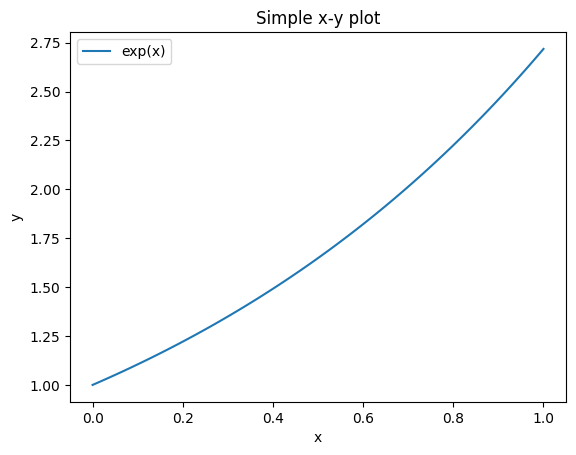

In [8]:
plt.plot(x, y, label='exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple x-y plot')
plt.legend(loc=0)
plt.show()

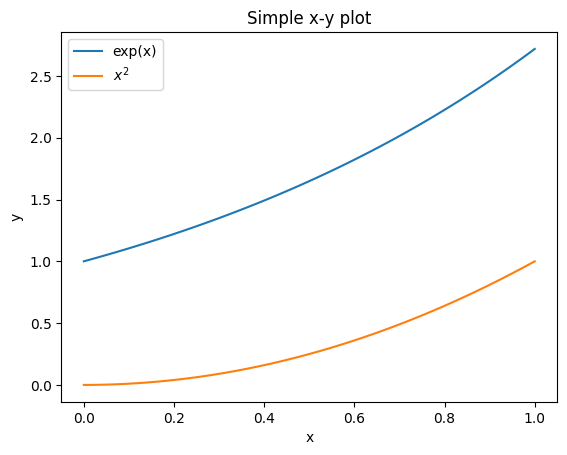

In [10]:
x = np.linspace(0,1,100)
y1 = np.exp(x)
y2 = [v ** 2 for v in x]

plt.plot(x, y1, label='exp(x)')
plt.plot(x, y2, label='$x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple x-y plot')
plt.legend(loc=0)
plt.show()

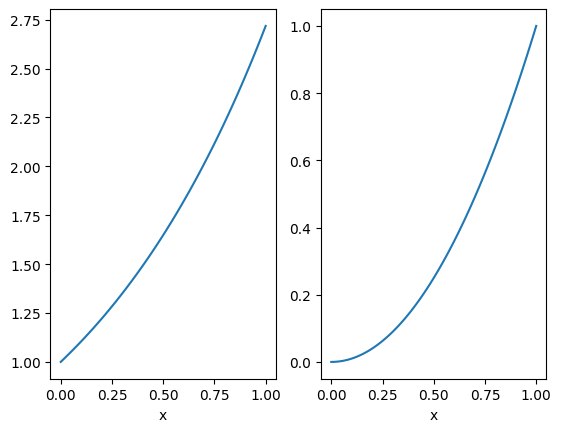

In [14]:
plt.subplot(121)
plt.plot(x, y1, label='exp(x)')
plt.xlabel('x')
plt.subplot(122)
plt.plot(x, y2, label='$x^2$')
plt.xlabel('x')
plt.show()

## Multi-axes, oop styled (`axes.xxx()`)

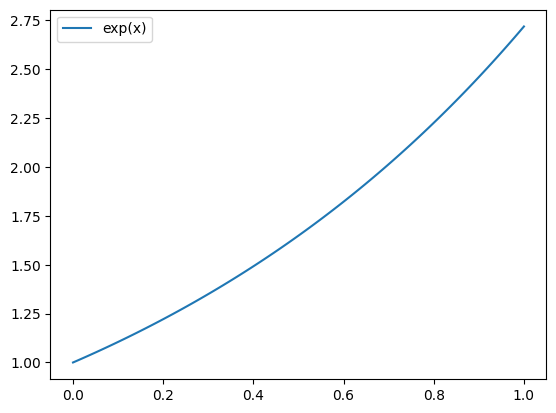

In [11]:
fig, axes = plt.subplots()
axes.plot(x, y, label='exp(x)')
axes.legend()
plt.show()


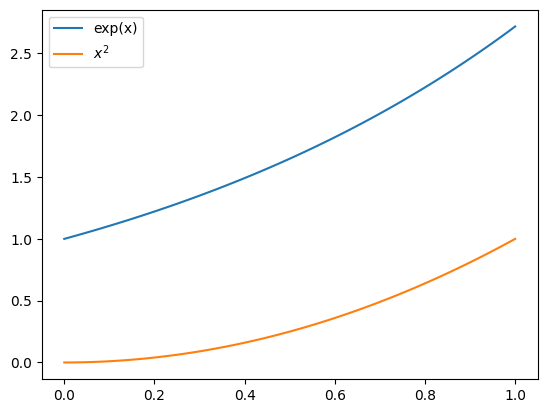

In [12]:
x = np.linspace(0,1,100)
y1 = np.exp(x)
y2 = [v ** 2 for v in x]

fig, axes = plt.subplots()
axes.plot(x, y1, label='exp(x)')
axes.plot(x, y2, label='$x^2$')
axes.legend()
plt.show()


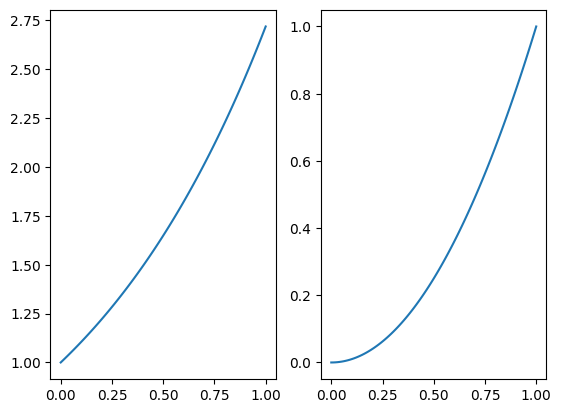

In [15]:
y = [y1,y2]
fig, axes = plt.subplots(1,2)
for i, ax in enumerate(axes):
    ax.plot(x,y[i])
plt.show()

## histogram test
`plt.hist()` - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

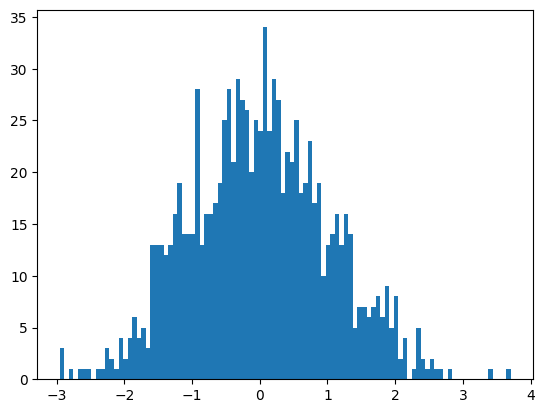

In [17]:
x = np.random.randn(1000)
plt.hist(x, bins=100)
plt.show()

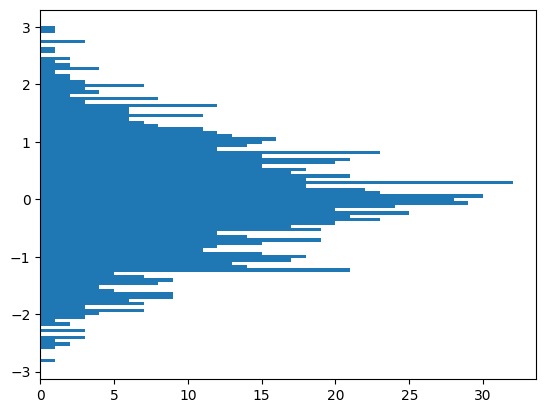

In [18]:
x = np.random.randn(1000)
plt.hist(x, bins=100, orientation='horizontal')
plt.show()

# Visualization with `seaborn`

`Seaborn` is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with pandas data structures.

`Seaborn` helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API **lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them**.

## Import the core library

In [25]:
import seaborn as sns

## Overview

This plot shows the relationship between five variables in the tips dataset using a single call to the `seaborn` function `relplot()`

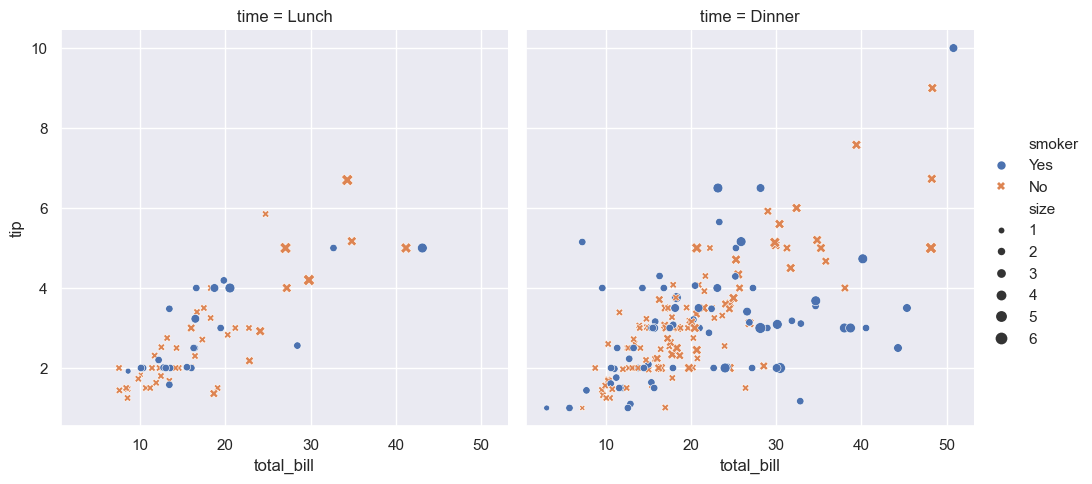

In [26]:
# Apply the default theme, for other options check https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

In [27]:
type(tips)

pandas.core.frame.DataFrame

In [10]:
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [32]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

About `sns.relplot`: https://seaborn.pydata.org/generated/seaborn.relplot.html

```python
seaborn.relplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='auto', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```

Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

* `scatterplot()` (with kind="scatter"; the default)
* `lineplot()` (with kind="line")

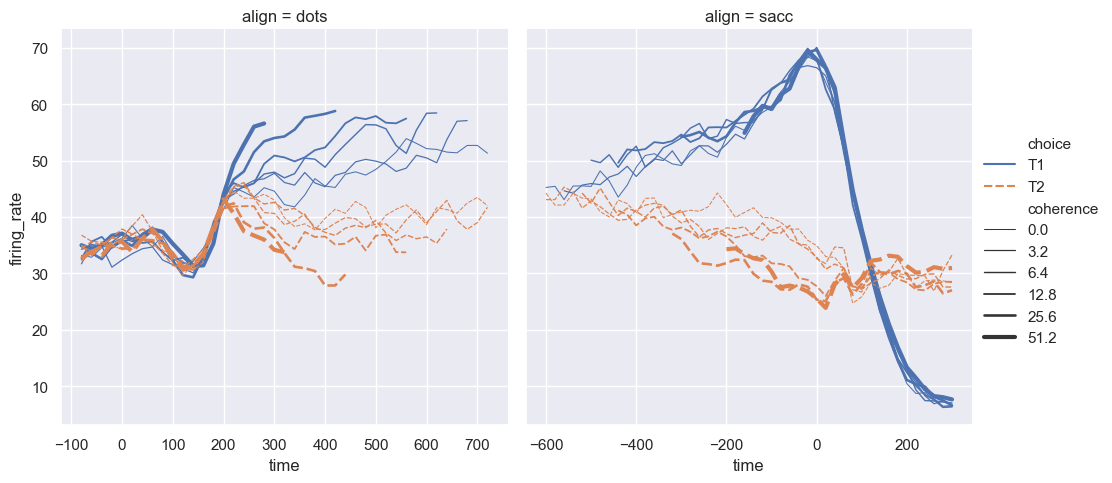

In [33]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

A list of `seaborn`'s built-in datasets: https://github.com/mwaskom/seaborn-data

In [11]:
dots.head(3)

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840

## Statistical estimation

In [34]:
fmri = sns.load_dataset("fmri")
type(fmri)

pandas.core.frame.DataFrame

In [35]:
fmri.head(3)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033

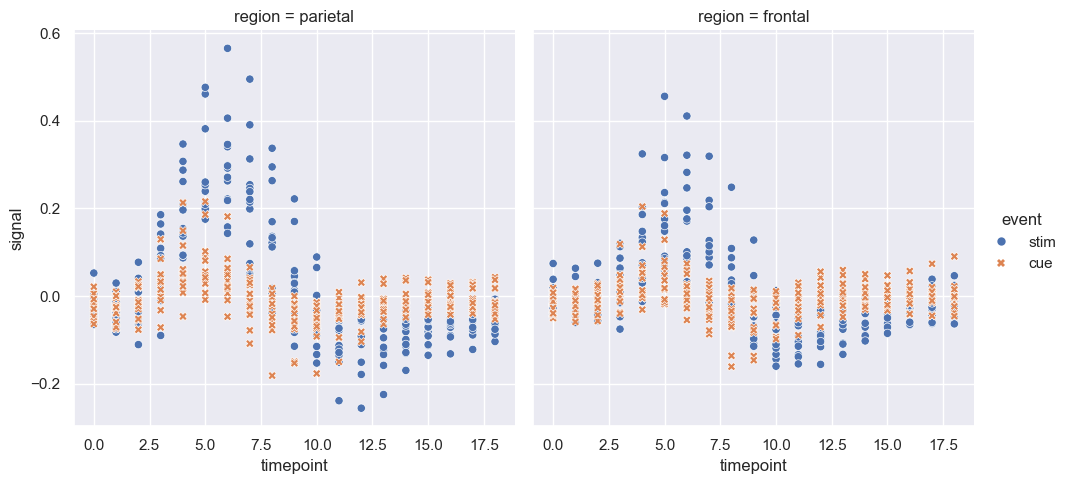

In [36]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri,
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

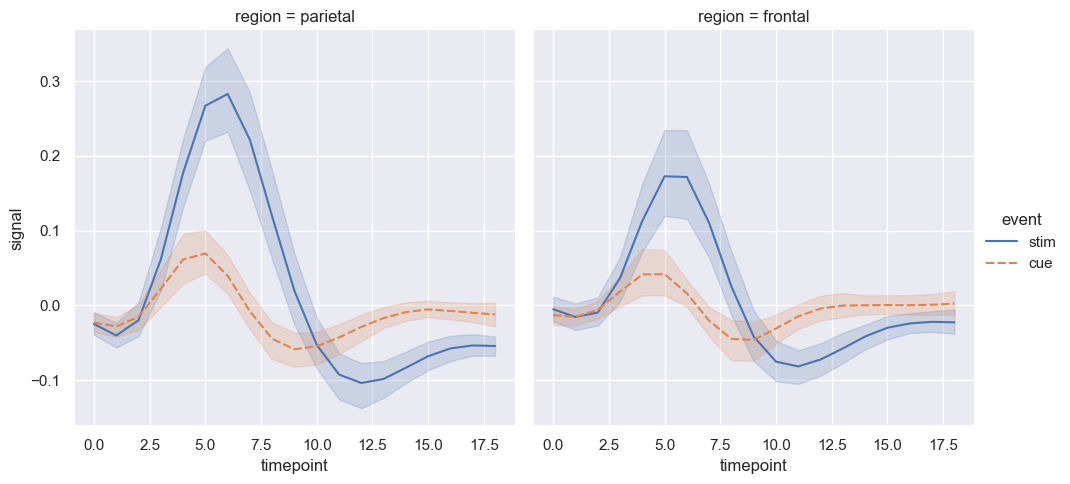

In [37]:
# mean and confidence intervals are presented automatically
sns.relplot(
    data=fmri, kind='line',
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

## Distributional representations

The `seaborn` function `displot()` supports several approaches to visualizing distributions. 

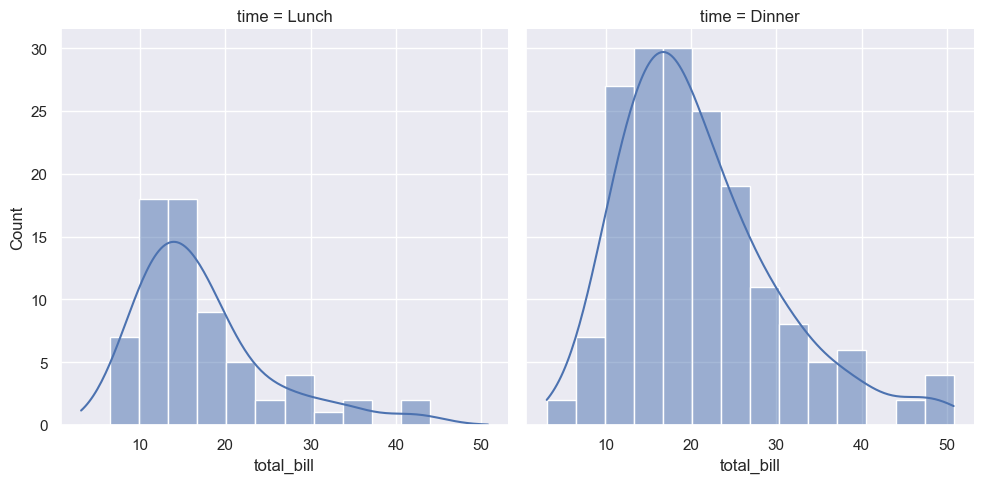

In [39]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()

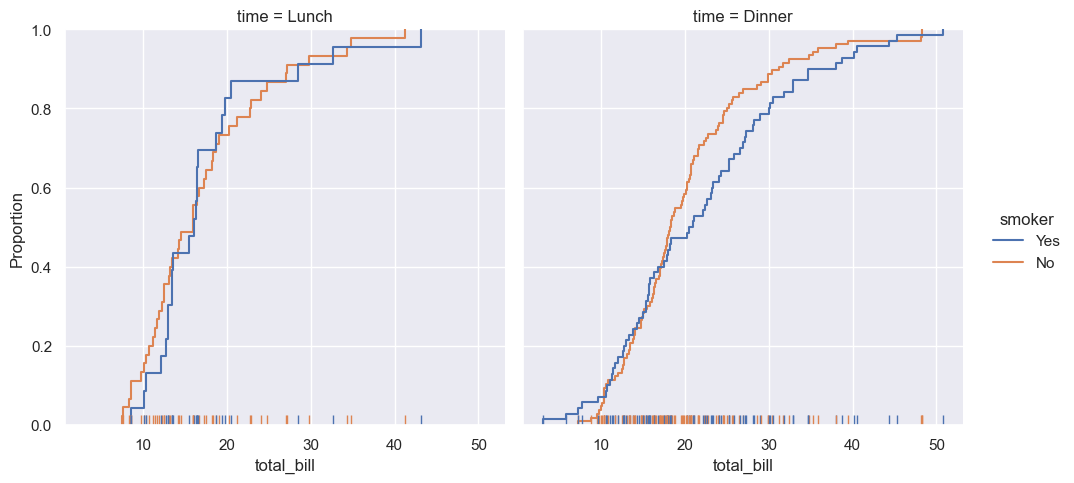

In [18]:
# Empirical cumulative distribution (ECD) function is also supported

sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show()

In [40]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

In [41]:
penguins.select_dtypes(exclude='object').corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

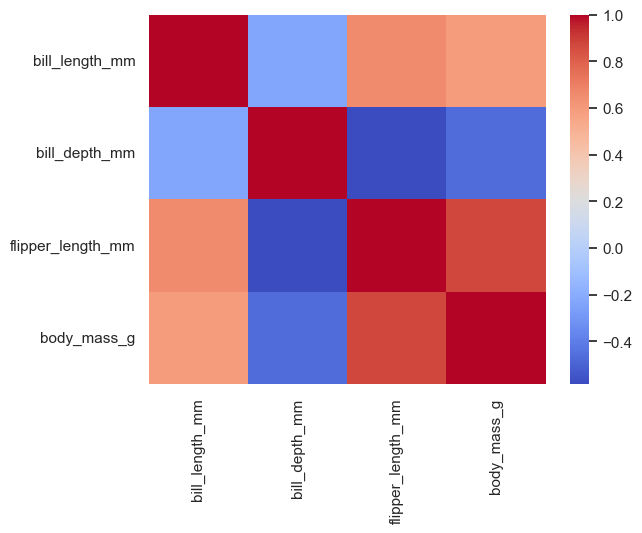

In [42]:
sns.heatmap(penguins.select_dtypes(exclude='object').corr(),cmap='coolwarm')
plt.show()

## Plots for categorical variables

In [61]:
tips.groupby('day')['total_bill'].mean()

/var/folders/78/njcscll93_s6cc27zw_h0pmr0000gn/T/ipykernel_7998/3902244131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

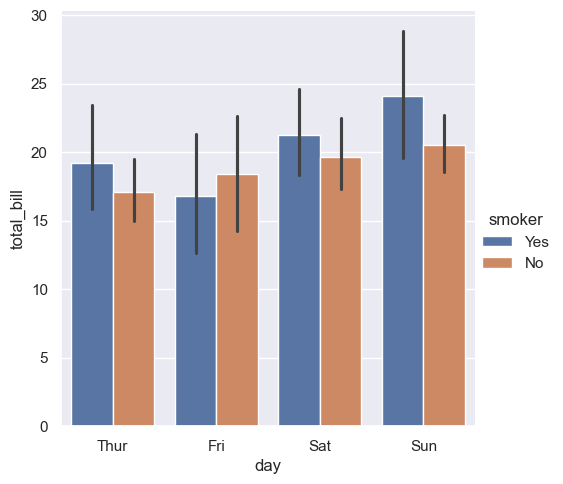

In [43]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

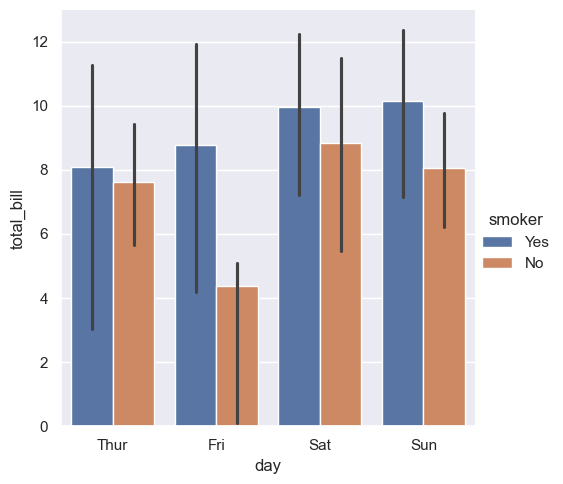

In [45]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker", estimator=np.std)
plt.show()

In [46]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female

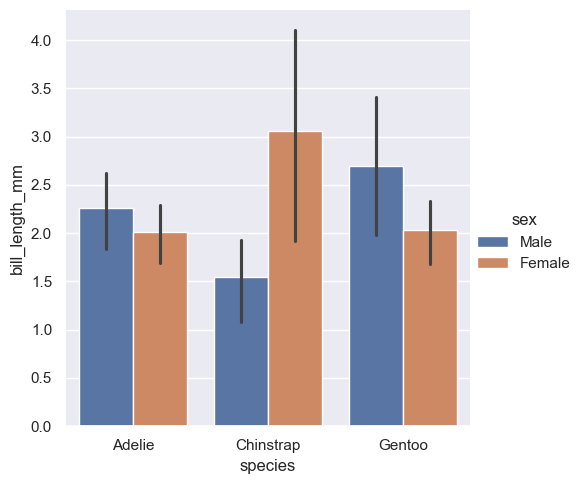

In [47]:
# More details on sns.catplot(), check https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(data=penguins, kind="bar", x="species", y="bill_length_mm", hue="sex", estimator=np.std)
plt.show()

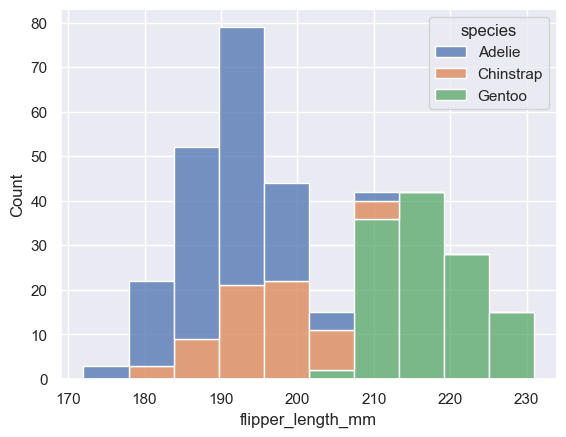

In [48]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

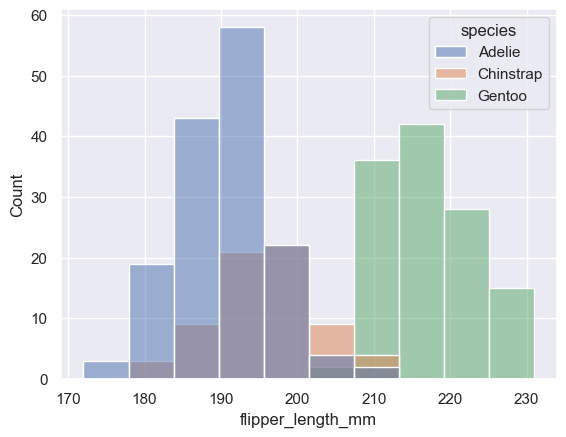

In [49]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
plt.show()

## Multivariate views on complex datasets

`jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution

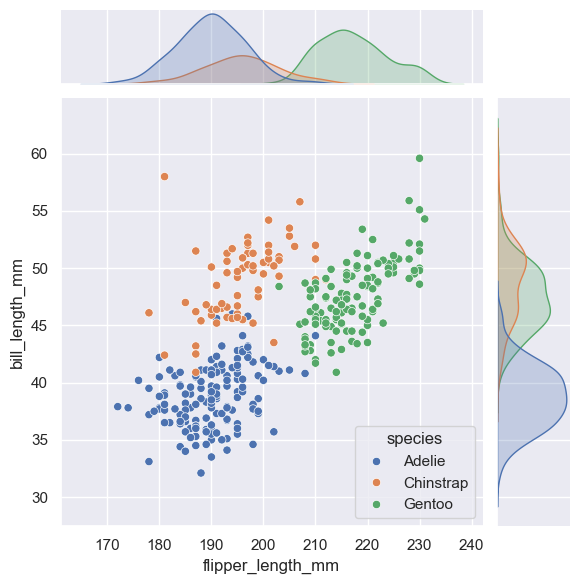

In [52]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

`pairplot()`, takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable

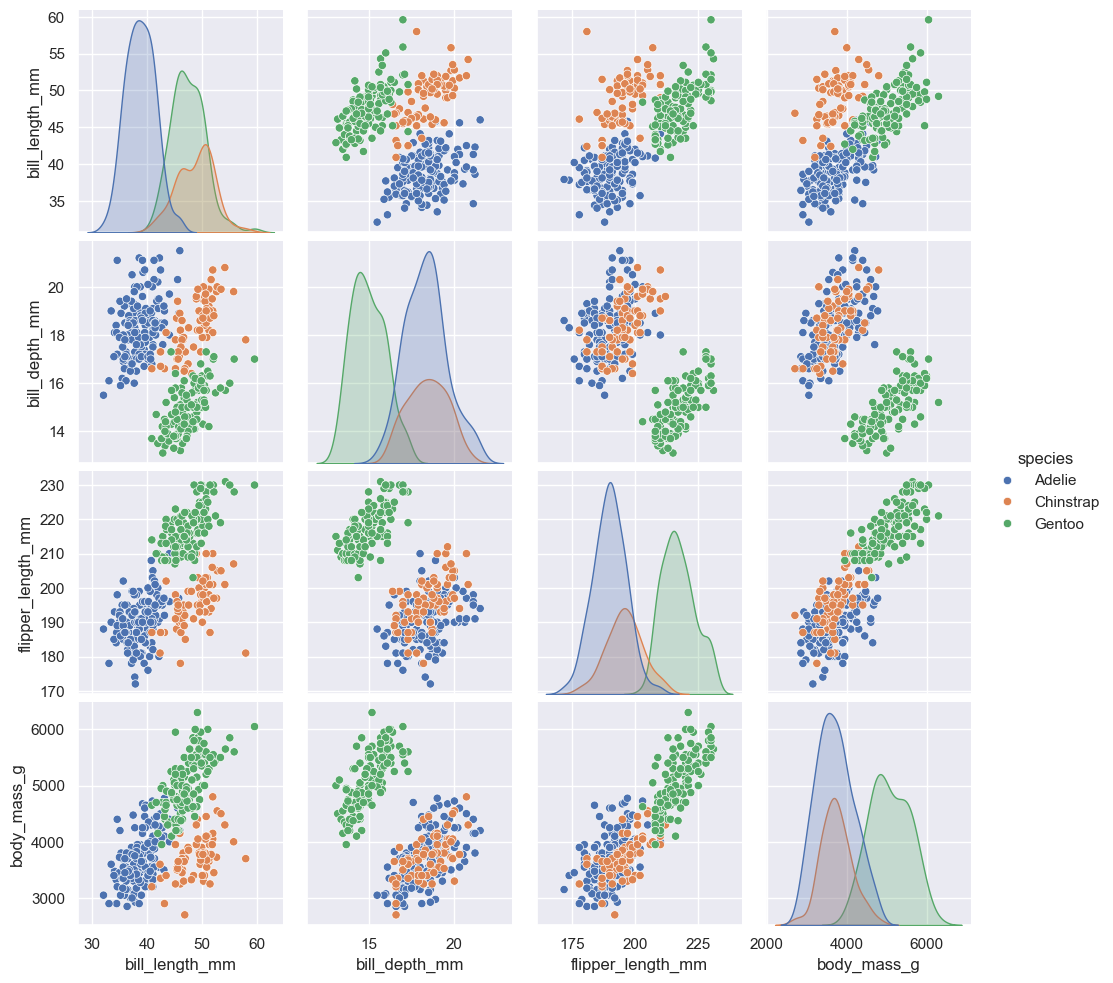

In [54]:
sns.pairplot(data=penguins, hue="species")
plt.show()

## Some fine controls

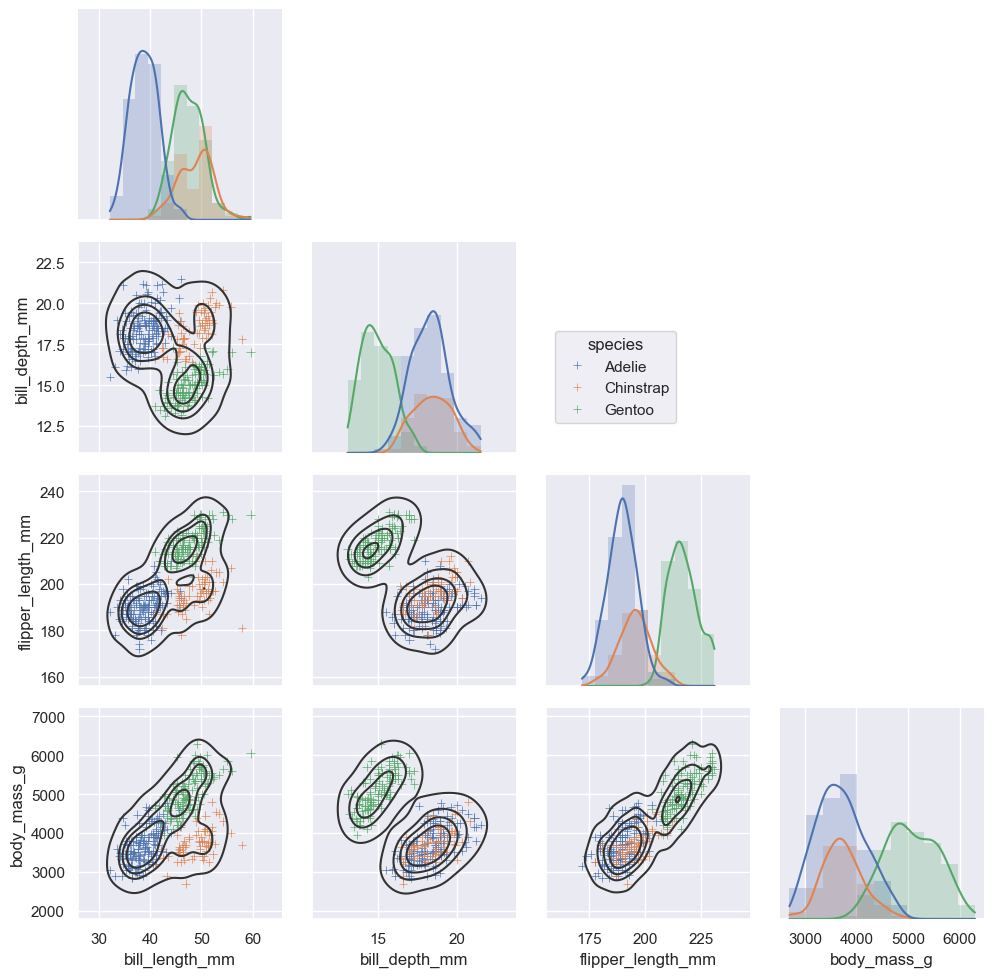

In [55]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))
plt.show()

## `Seaborn` plot functions
- Most of your interactions with seaborn will happen through a set of plotting functions
- The seaborn namespace is flat; all of the functionality is accessible at the top level.

### Similar functions for similar tasks

https://seaborn.pydata.org/api.html#distribution-api

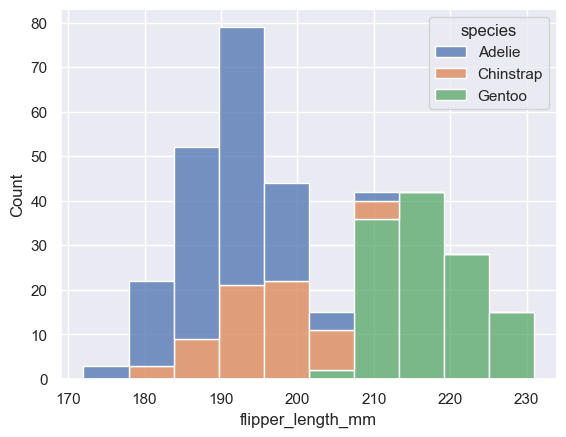

In [62]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

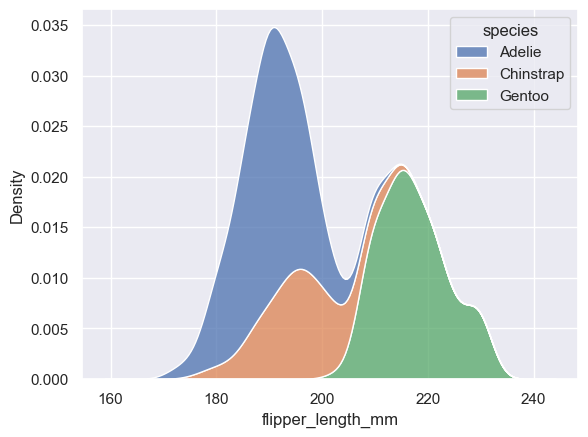

In [63]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

### Figure-level vs. axes-level functions
![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

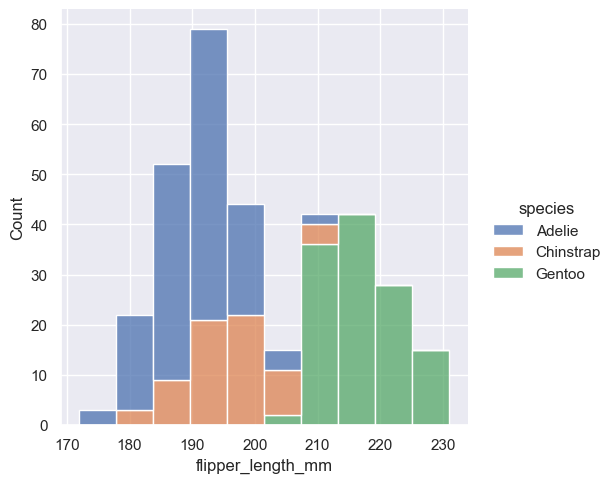

In [64]:
# Figure level function
# Default for sns.displot() is to plot a histogram
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

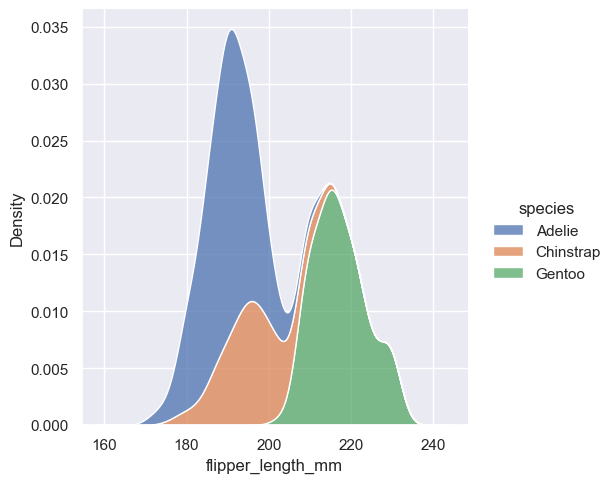

In [65]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")
plt.show()

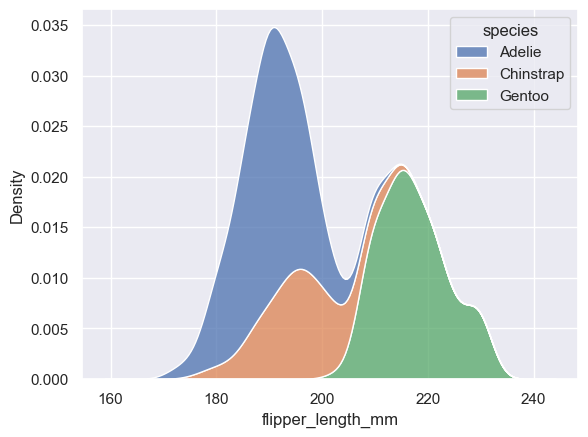

In [66]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
plt.show()

Figure-level plots look mostly like their axes-level counterparts with some minor differences. The most useful feature offered by the figure-level functions is that they can easily create figures with multiple subplots. 

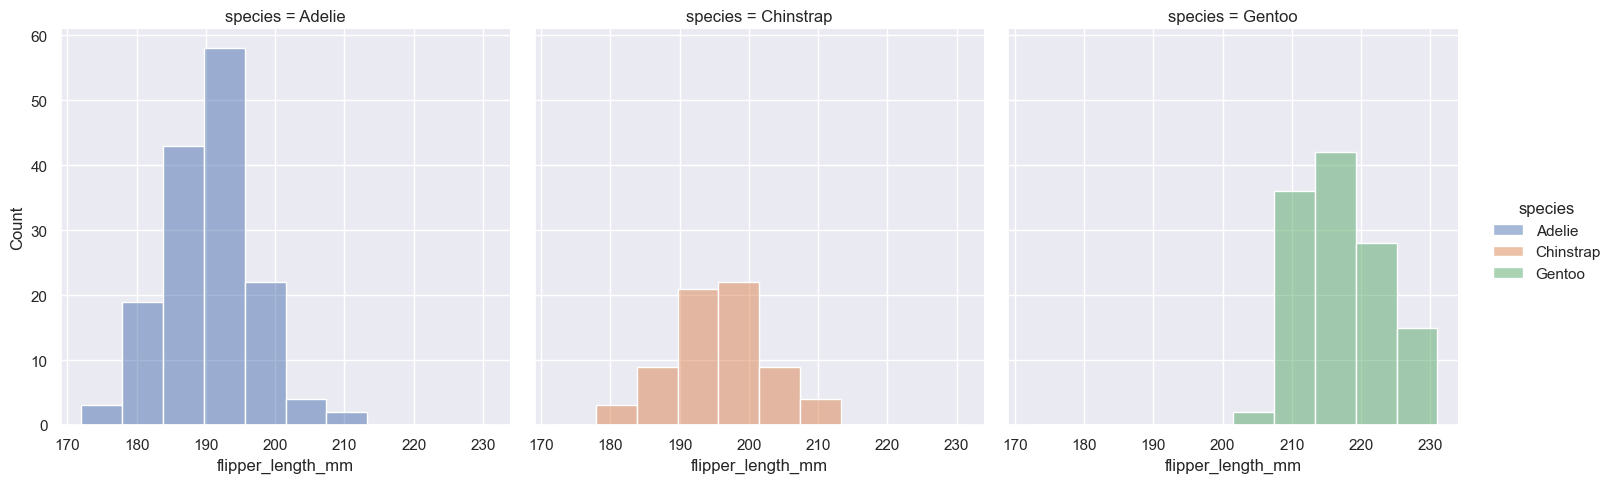

In [34]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")
plt.show()

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results. In contrast, figure-level functions cannot (easily) be composed with other plots.

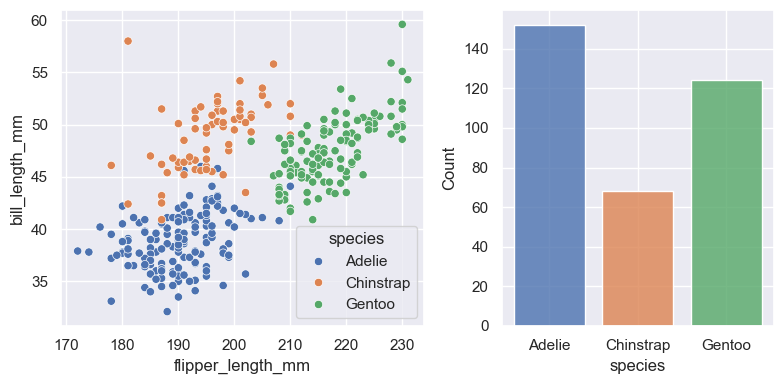

In [35]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()
plt.show()

# `plotly`

Plotly is a [free and open-source](https://plotly.com/python/is-plotly-free/) graphing library for Python that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

Built on top of the Plotly JavaScript library (plotly.js), plotly enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. The plotly Python library is sometimes referred to as "plotly.py" to differentiate it from the JavaScript library.

The `plotly.express` module (usually imported as `px`) contains functions that can create entire figures at once, and is referred to as `Plotly Express` or `PX`. Plotly Express is a built-in part of the plotly library, and is **the recommended starting point** for creating most common figures.

## Common visualization graphs

### Scatter plot

In [1]:
import plotly.express as px

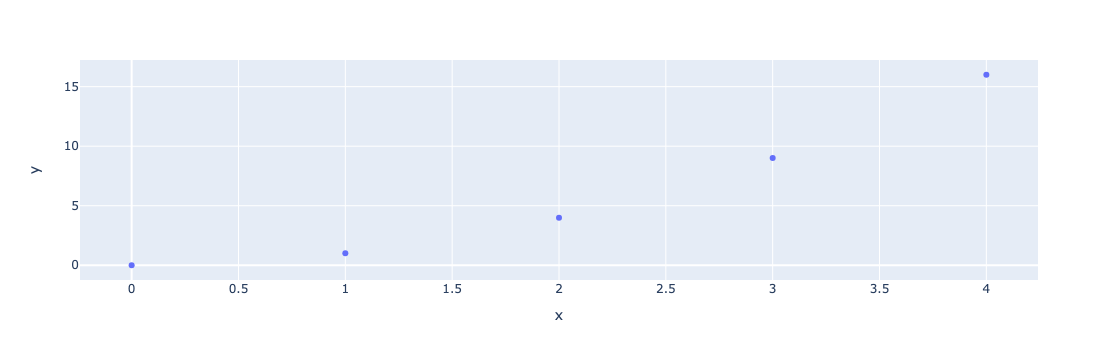

In [3]:
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

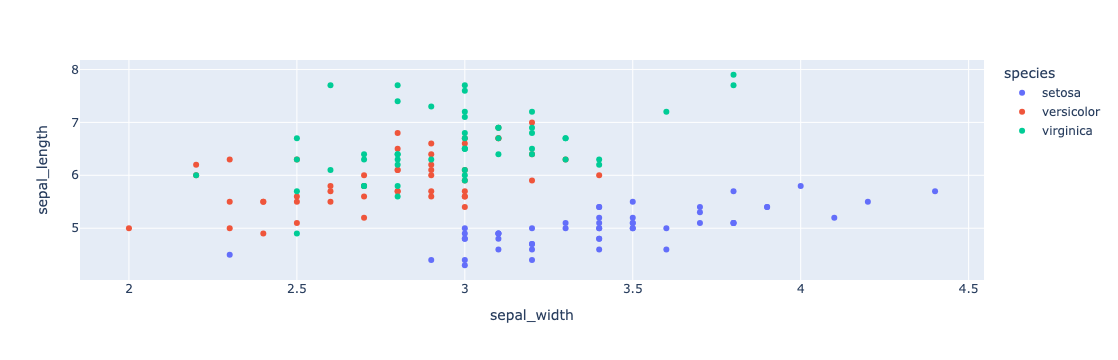

In [4]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [5]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1

In [41]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

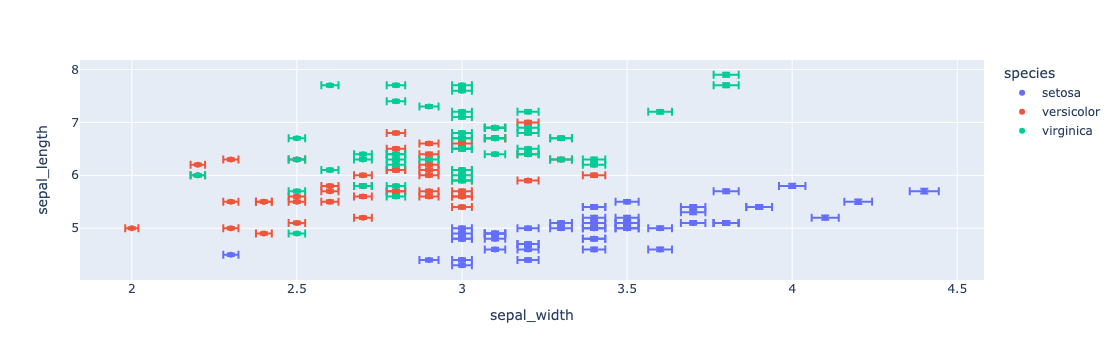

In [6]:
df["e"] = df["sepal_width"]/100
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", error_x="e", error_y="e")
fig.show()

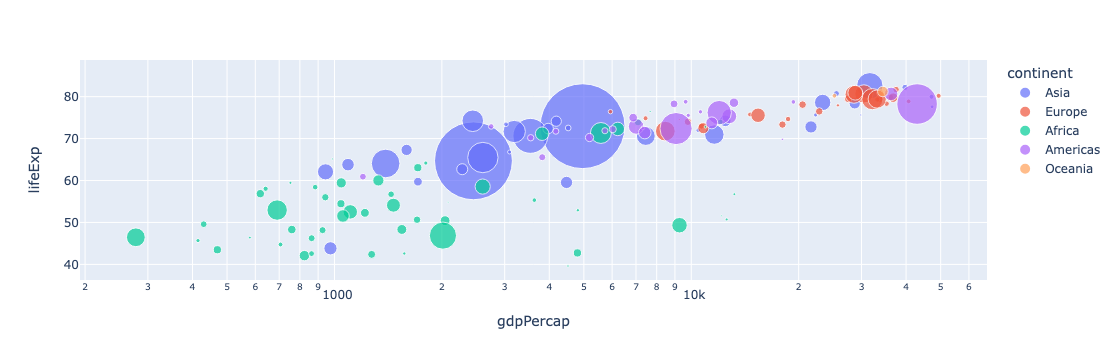

In [7]:
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

### Line chart

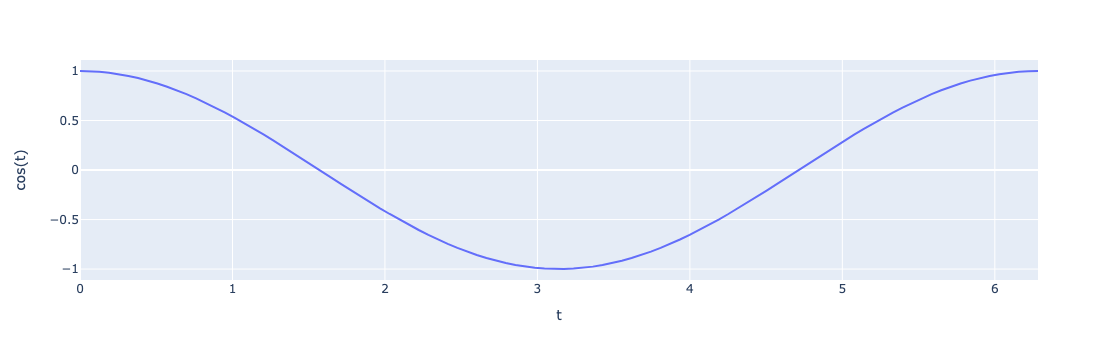

In [10]:
t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

`plotly`'s built-in datasets https://plotly.com/python-api-reference/generated/plotly.express.data.html

In [11]:
gapminder = px.data.gapminder()
gapminder.head(3)

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   

   iso_num  
0        4  
1        4  
2        4

In [13]:
df = px.data.gapminder().query("continent == 'Asia' and country in ('China', 'India', 'Japan')")
df.country.unique()

array(['China', 'India', 'Japan'], dtype=object)

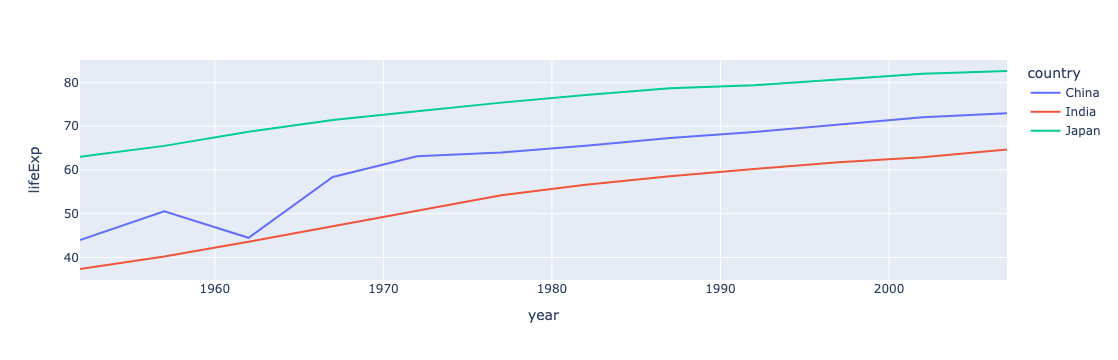

In [14]:
df = px.data.gapminder().query("continent == 'Asia' and country in ('China', 'India', 'Japan')")
fig = px.line(df, x='year', y='lifeExp', color='country')
fig.show()

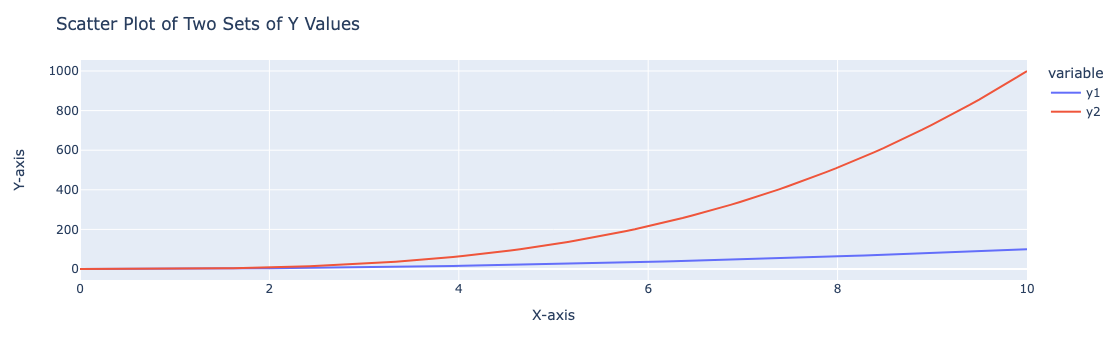

In [15]:
# Create a DataFrame with data for two sets of y values sharing the same x values
x = np.linspace(0, 10, 100)
data = {
    'x': x,
    'y1': [v**2 for v in x],  # Data for the first set of y values
    'y2': [v**3 for v in x]   # Data for the second set of y values
}

df = pd.DataFrame(data)


# Create a scatter plot with legend labels for the two sets of y values
fig = px.line(df, x='x', y=['y1', 'y2'])

# Customize the chart as needed
fig.update_layout(
    title='Scatter Plot of Two Sets of Y Values',
    xaxis_title='X-axis',
    yaxis_title='Y-axis'
)

# Show the chart
fig.show()

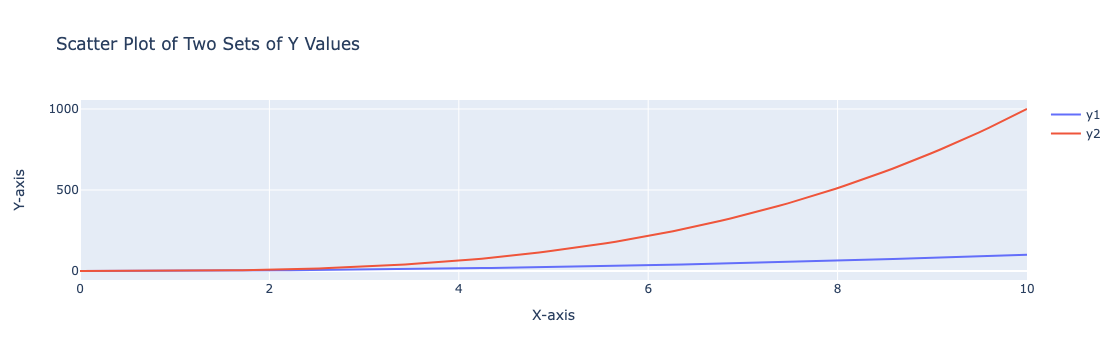

In [16]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
   x=x,
   y=[v ** 2 for v in x],
   name="y1"
))
fig.add_trace(go.Scatter(
   x=x,
   y=[v ** 3 for v in x],
   name="y2"
))
fig.update_layout(
    title='Scatter Plot of Two Sets of Y Values',
    xaxis_title='X-axis',
    yaxis_title='Y-axis'
)

fig.show()

### Bar chart

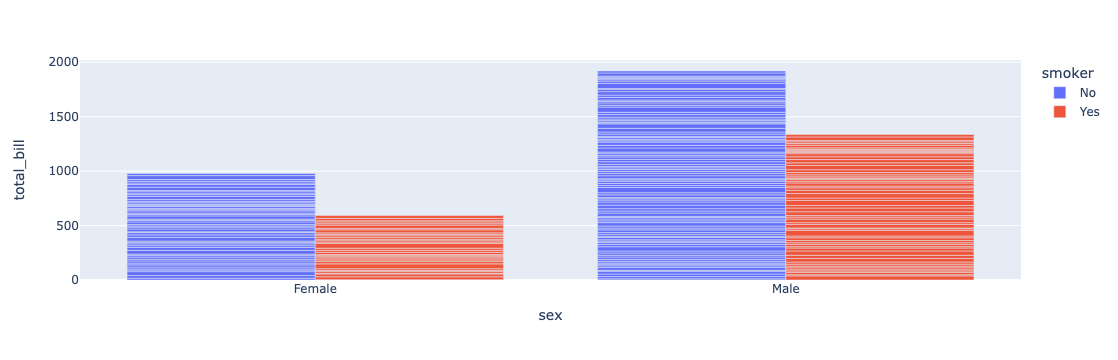

In [17]:
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group")
fig.show()

### Parallel coordinates graph

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

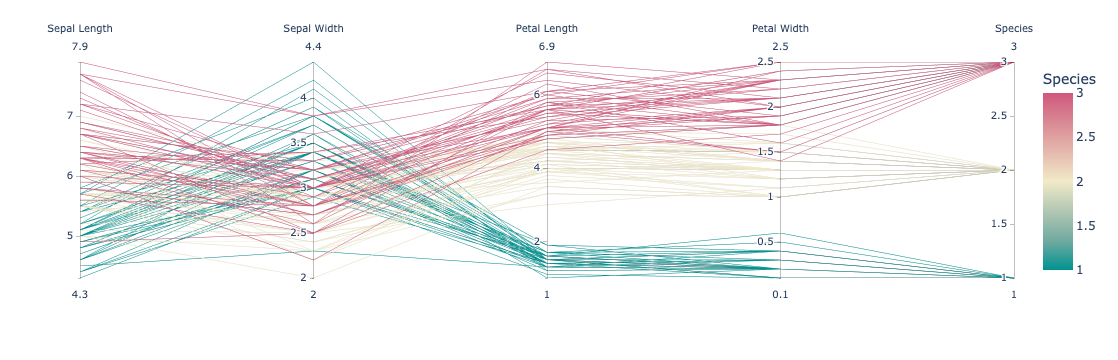

In [19]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [94]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1

In [95]:
df.species_id.value_counts()

species_id
1    50
2    50
3    50
Name: count, dtype: int64

### Animations

In [21]:
df = px.data.gapminder()
df.head(3)

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   

   iso_num  
0        4  
1        4  
2        4

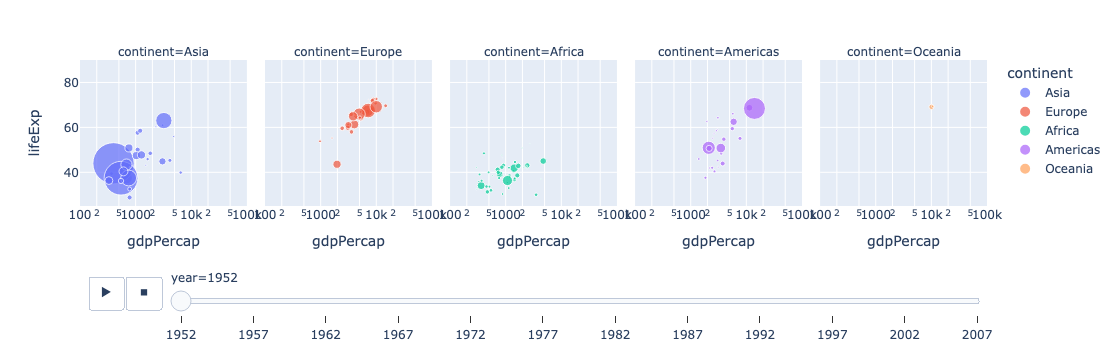

In [22]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

Save images
- https://plotly.com/python/static-image-export/


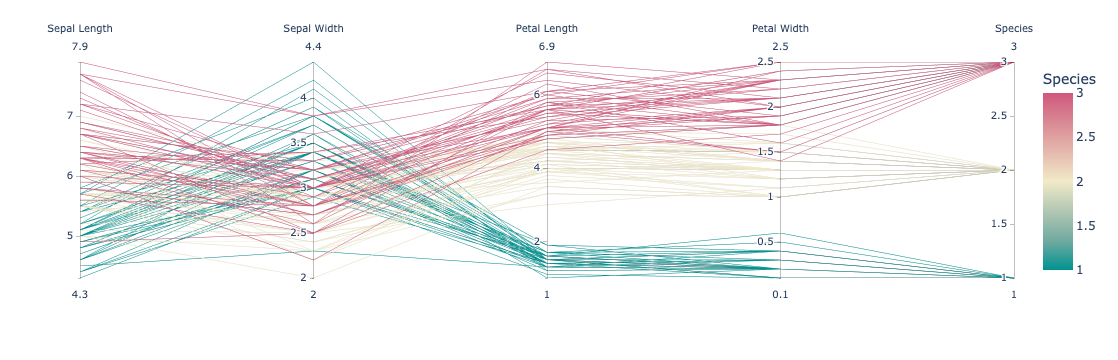

In [24]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()
# fig.write_image('../pics/plotly_example1.png')

In [25]:
fig.write_image('../pics/plotly_example1.png')

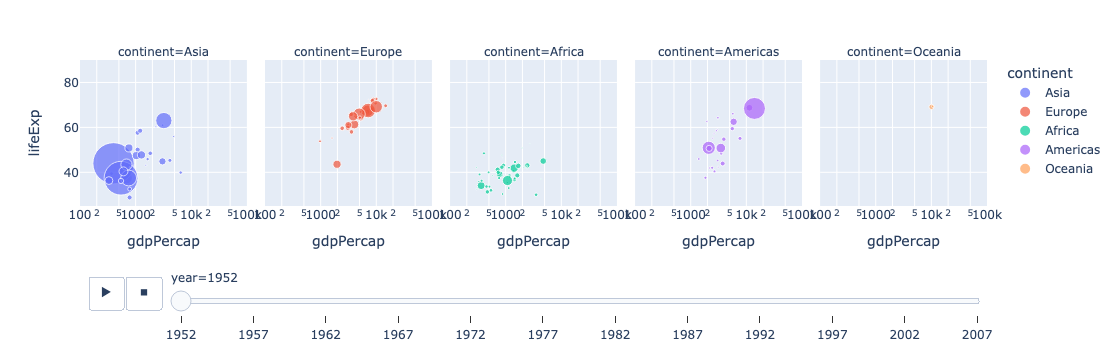

In [23]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()
fig.write_html('../pics/plotloy_example2.html')

# Regression Analysis - Linear Regression

Suppose you want to know **if money makes people happy**, so you download the Better Life Index data from the OECD’s website and stats about gross domestic product (GDP) per capita from the IMF’s website.
* OECD: https://www.oecdbetterlifeindex.org/
* IMF: https://ourworldindata.org/

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

## Get the data

In [28]:
oecd_bli = pd.read_csv('../data/oecd-better-life-index.csv',sep=',',header=0)
gdp_per_capita = pd.read_csv('../data/imf-gdp-per-capita.csv',sep=',',header=0,thousands=',')

In [29]:
oecd_bli.head(3)

LOCATION    Country INDICATOR                 Indicator MEASURE Measure  \
0      AUS  Australia   JE_LMIS  Labour market insecurity       L   Value   
1      AUT    Austria   JE_LMIS  Labour market insecurity       L   Value   
2      BEL    Belgium   JE_LMIS  Labour market insecurity       L   Value   

  INEQUALITY Inequality Unit Code        Unit  PowerCode Code PowerCode  \
0        TOT      Total        PC  Percentage               0     Units   
1        TOT      Total        PC  Percentage               0     Units   
2        TOT      Total        PC  Percentage               0     Units   

   Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0                    NaN               NaN    5.4         NaN    NaN  
1                    NaN               NaN    3.5         NaN    NaN  
2                    NaN               NaN    3.7         NaN    NaN

In [31]:
gdp_per_capita.head(3)

Country                                 Subject Descriptor  \
0  Afghanistan  Gross domestic product per capita, current prices   
1      Albania  Gross domestic product per capita, current prices   
2      Algeria  Gross domestic product per capita, current prices   

          Units  Scale                      Country/Series-specific Notes  \
0  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
1  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   
2  U.S. dollars  Units  See notes for:  Gross domestic product, curren...   

       2015  Estimates Start After  
0   599.994                 2013.0  
1  3995.380                 2010.0  
2  4318.140                 2014.0

## Transform the data

Get the view of 

| Country | GDP per capita (USD) | Life satisfaction |
|---------|----------------------|-------------------|

### format the oecd data

In [11]:
oecd_bli.Indicator.unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

In [12]:
oecd_bli.Inequality.unique()

array(['Total', 'Men', 'Women', 'High', 'Low'], dtype=object)

In [33]:
oecd_bli2 = oecd_bli.loc[
    (oecd_bli.Inequality=='Total')&(oecd_bli.Indicator=='Life satisfaction'),
    ['Country','Value']
].rename(columns={'Country':'country','Value':'life_satisfaction'})

In [34]:
oecd_bli2.head(3)

country  life_satisfaction
1813  Australia                7.3
1814    Austria                7.1
1815    Belgium                6.9

In [35]:
oecd_bli2.tail(3)

country  life_satisfaction
1851  OECD - Total                6.5
2349      Colombia                6.3
2350     Lithuania                5.9

In [36]:
oecd_bli2.country.nunique()

41

### format the gdp per capita data

In [37]:
gdp_per_capita.Units.unique()

array(['U.S. dollars'], dtype=object)

In [38]:
gdp_per_capita2 = gdp_per_capita.loc[:,['Country','2015']].rename(columns={
    'Country':'country',
    '2015':'gdp_per_capita'
})
gdp_per_capita2.head(3)

country  gdp_per_capita
0  Afghanistan         599.994
1      Albania        3995.380
2      Algeria        4318.140

In [39]:
gdp_per_capita2.country.nunique()

189

### join the two

In [40]:
country_stats = pd.merge(
    gdp_per_capita2,
    oecd_bli2,
    on='country'
).sort_values(by='gdp_per_capita').reset_index(drop=True)

In [41]:
country_stats.head(3)

country  gdp_per_capita  life_satisfaction
0  South Africa         5694.57                4.7
1      Colombia         6083.51                6.3
2        Brazil         8670.00                6.4

In [42]:
country_stats.tail(3)

country  gdp_per_capita  life_satisfaction
37       Norway        74822.11                7.6
38  Switzerland        80675.31                7.5
39   Luxembourg       101994.09                6.9

In [43]:
country_stats.shape

(40, 3)

In [44]:
country_stats.head(3)

country  gdp_per_capita  life_satisfaction
0  South Africa         5694.57                4.7
1      Colombia         6083.51                6.3
2        Brazil         8670.00                6.4

In [46]:
country_stats[['gdp_per_capita', 'life_satisfaction']].corr()

gdp_per_capita  life_satisfaction
gdp_per_capita           1.000000           0.720523
life_satisfaction        0.720523           1.000000

## split the data

In [47]:
# remove_indices = [2,3,8,12,37,38,39]
# keep_indices = list(set(range(40)) - set(remove_indices))

countries_remove = ['Brazil','Mexico','Chile','Czech Republic','Norway','Switzerland','Luxembourg']
countries_keep = set(country_stats.country) - set(countries_remove)

In [49]:
# sample_data = country_stats.iloc[keep_indices]
# missing_data = country_stats.iloc[remove_indices]
sample_data = country_stats[country_stats.country.isin(countries_keep)]
missing_data = country_stats[country_stats.country.isin(countries_remove)]

In [50]:
missing_data

country  gdp_per_capita  life_satisfaction
2           Brazil         8670.00                6.4
3           Mexico         9009.28                6.5
8            Chile        13340.91                6.5
12  Czech Republic        17256.92                6.7
37          Norway        74822.11                7.6
38     Switzerland        80675.31                7.5
39      Luxembourg       101994.09                6.9

In [51]:
sample_data.head(3)

country  gdp_per_capita  life_satisfaction
0  South Africa         5694.57                4.7
1      Colombia         6083.51                6.3
4        Russia         9054.91                5.8

## visualize the sample data

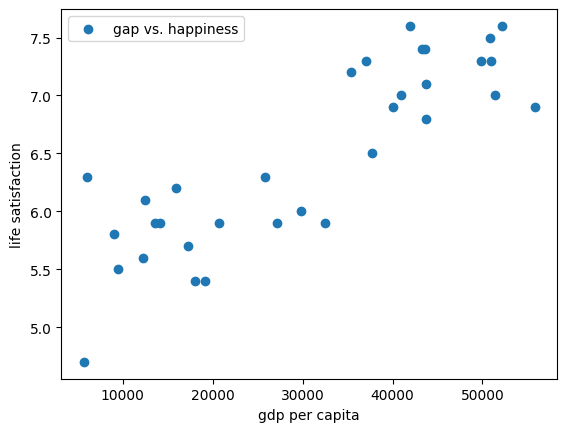

In [52]:
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction, label = 'gap vs. happiness')
plt.xlabel('gdp per capita')
plt.ylabel('life satisfaction')
plt.legend()

plt.show()

In [53]:
sample_data[sample_data.country.isin(['Hungary','Korea','France','Australia','United States'])]

country  gdp_per_capita  life_satisfaction
6         Hungary        12239.89                5.6
18          Korea        27195.20                5.9
23         France        37675.01                6.5
33      Australia        50961.87                7.3
36  United States        55805.20                6.9

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



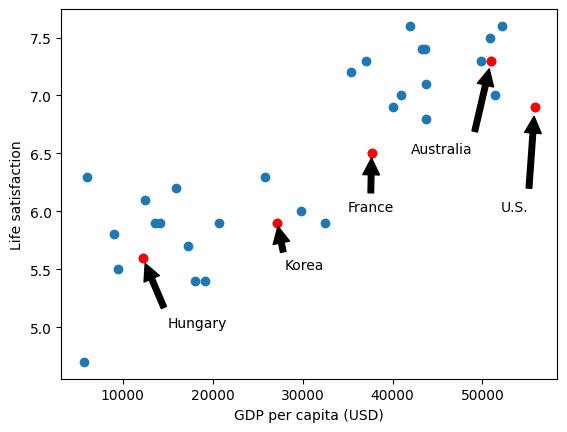

In [54]:
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction)
position_text = {
    "Hungary": (15000, 5),
    "Korea": (28000, 5.5),
    "France": (35000, 6.0),
    "Australia": (42000, 6.5),
    "United States": (52000, 6.0),
}

for country, pos_text in position_text.items():
    pos_data_x = sample_data.loc[sample_data.country==country,'gdp_per_capita']
    pos_data_y = sample_data.loc[sample_data.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', shrink=0.1))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.show()

There seems to be a linear trend here!!

## Fit a linear regression model!

Linear regression model
$$
y = \theta_0 + \theta_1X
$$

The fit essentially minimized the Sum of Squared Errors (SSE)
$$
SSE = \sum_{i=1}^{N} (y_i - \hat{y_i})^2 = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1X_i)^2
$$
Or, in the matrix form
$$
SSE = ||y - Xw||^2
$$

![](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png)

In [55]:
%%time

from sklearn import linear_model
lr = linear_model.LinearRegression()

# prepare the data
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]
# Xsample = sample_data.gdp_per_capita
# ysample = sample_data.life_satisfaction

# train the model
lr.fit(Xsample, ysample)

# get the model parameters
# t0, t1 = lr.intercept_[0], lr.coef_[0][0]
t0 = lr.intercept_[0]
t1 = lr.coef_[0][0]

t0, t1

CPU times: user 2.61 ms, sys: 373 µs, total: 2.98 ms
Wall time: 3.25 ms


(5.166394143672077, 4.247060194254786e-05)

In [56]:
Xsample.ndim

2

In [32]:
Xsample.shape

(33, 1)

In [33]:
ysample.shape

(33, 1)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



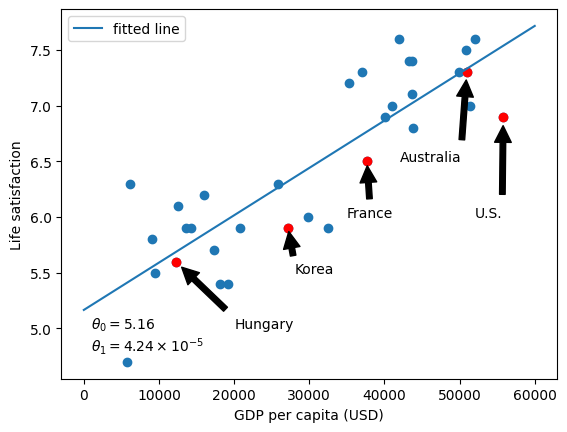

In [34]:
## same as previous plot
plt.scatter(sample_data.gdp_per_capita, sample_data.life_satisfaction)
position_text = {
    "Hungary": (20000, 5),
    "Korea": (28000, 5.5),
    "France": (35000, 6.0),
    "Australia": (42000, 6.5),
    "United States": (52000, 6.0),
}

for country, pos_text in position_text.items():
    pos_data_x = sample_data.loc[sample_data.country==country,'gdp_per_capita']
    pos_data_y = sample_data.loc[sample_data.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', shrink=0.1))
    plt.plot(pos_data_x, pos_data_y, "ro")

## plot the fitted line here
X = np.linspace(start=0, stop=60000, num=1000)
plt.plot(X, t1*X + t0, label='fitted line')
plt.text(1000, 5, '$\\theta_0=5.16$')
plt.text(1000, 4.8, '$\\theta_1=4.24 \\times 10^{-5}$')
    
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.show()

## Make predictions to a new country

In [35]:
gdp_per_capita2[gdp_per_capita2.country=='Cyprus']

country  gdp_per_capita
42  Cyprus        22587.49

In [36]:
X_new = [[22587.49]]
lr.predict(X_new)

array([[6.12569844]])

In [37]:
gdp_per_capita2[gdp_per_capita2.country=='China']

country  gdp_per_capita
34   China         7989.72

In [38]:
X_new = [[7989.72]]
lr.predict(X_new)

array([[5.50572236]])

## What happens when we add the missing countries back to the data?

In [39]:
missing_data

country  gdp_per_capita  life_satisfaction
2           Brazil         8670.00                6.4
3           Mexico         9009.28                6.5
8            Chile        13340.91                6.5
12  Czech Republic        17256.92                6.7
37          Norway        74822.11                7.6
38     Switzerland        80675.31                7.5
39      Luxembourg       101994.09                6.9

In [40]:
%%time

lr2 = linear_model.LinearRegression()

# prepare the data
Xfull = np.c_[country_stats.gdp_per_capita]
yfull = np.c_[country_stats.life_satisfaction]

# train the model
lr2.fit(Xfull, yfull)

# get the model parameters
t0full, t1full = lr2.intercept_[0], lr2.coef_[0][0]
t0full, t1full

CPU times: user 1.82 ms, sys: 260 µs, total: 2.08 ms
Wall time: 1.96 ms


(5.72408173931895, 2.4690442763171645e-05)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



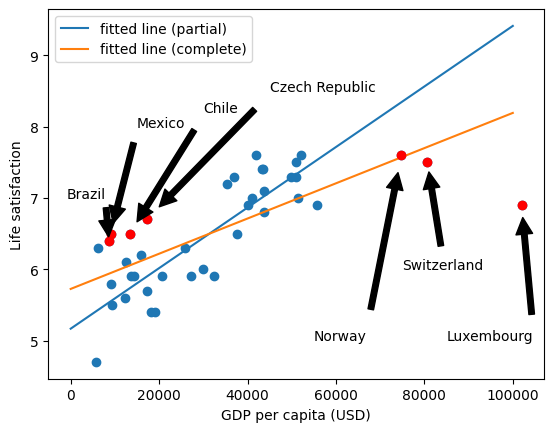

In [41]:
## same as previous plot
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

X = np.linspace(start=0, stop=100000, num=1000)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', shrink=0.1))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.show()

Apparently, the previous training data `sample_data` we used isn't representative!!

## Overfitting

In [45]:
## add polynomial features
from sklearn import preprocessing

df = 10
poly = preprocessing.PolynomialFeatures(degree=df)
scaler = preprocessing.StandardScaler()
lr3 = linear_model.LinearRegression()

Xfull_new = scaler.fit_transform(
    poly.fit_transform(Xfull)
)

## fit linear regression model on Xfull_new
lr3.fit(Xfull_new,yfull)

LinearRegression()

In [46]:
## define a set of new X
X = np.c_[np.linspace(start=0, stop=100000, num=1000)]

X_new = scaler.fit_transform(
    poly.fit_transform(X)
)

## predict on the new X
y = lr3.predict(X_new)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



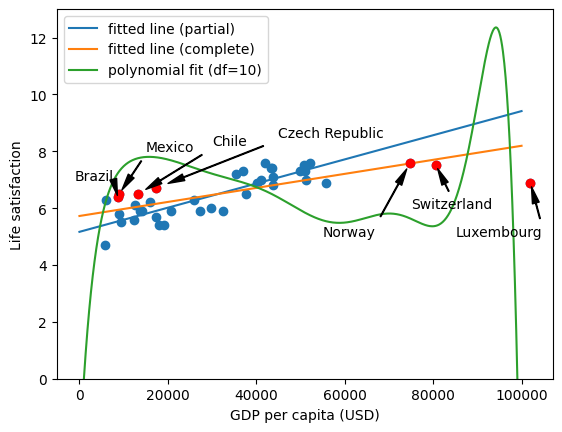

In [47]:
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

## plot the polynomial fit
plt.plot(X,y,label='polynomial fit (df={})'.format(df))
    
    
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.ylim(0,13)
plt.legend()
plt.show()

## Apply L2 Regularization (Ridge Regression)

Instead of minimizing
$$
SSE = ||y - Xw||^2
$$

We will minimize
$$
SSE = ||y - Xw||^2 + \alpha ||w||^2
$$

In the 2D situation

$$
SSE = ||y - Xw||^2 + \alpha ||w||^2 = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1X_i)^2 + \alpha (\theta_0^2 + \theta_1^2)
$$

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* There is another kind of regularization called `L1 Regularization` (also called `Lasso Regression`)
    * More details can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
    * Aur´elien G´eron `Hands-On Machine Learning with Scikit-Learn and TensorFlow` O’Reilly Media, 2022.
        * Chapter 4
    * Differences between `L1` and `L2` regularization
        * https://www.linkedin.com/pulse/intuitive-visual-explanation-differences-between-l1-l2-xiaoli-chen/
        * https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization-How-does-it-solve-the-problem-of-overfitting-Which-regularizer-to-use-and-when

The amount of regularization to apply during learning can be controlled by a hyperparameter. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. 

Here, the parameter $\alpha$ is a hyperparamter. If you set the regularization hyperparameter to a very large value, you will get an almost flat model (a slope close to zero); the learning algorithm will almost certainly not overfit the training data, but it will be less likely to find a good solution. Tuning hyperparameters is an important part of building a Machine Learning system

In [48]:
## apply regularization on the original fit on sample_data
ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1461: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/matplotlib/text.py:1463: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



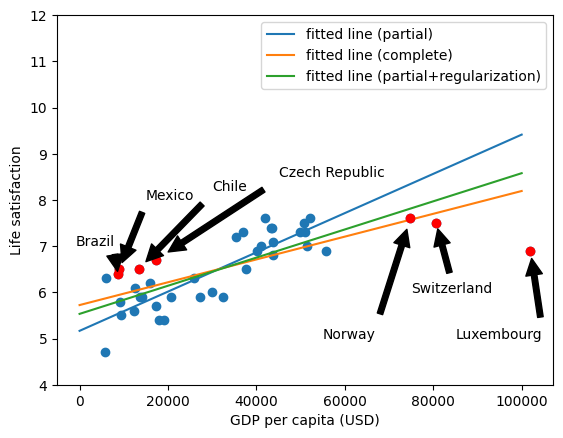

In [49]:
## same as previous plot
plt.scatter(country_stats.gdp_per_capita, country_stats.life_satisfaction)

X = np.linspace(start=0, stop=100000, num=1000)

## plot the fitted line based on partial dataset
plt.plot(X, t1*X + t0, label='fitted line (partial)')

## plot the fitted line of the complete dataset
plt.plot(X, t1full*X + t0full, label='fitted line (complete)')

## plot the fitted line based on partial dataset with regularization
plt.plot(X, t1ridge*X + t0ridge, label='fitted line (partial+regularization)')

## highlight the countries from the missing data
position_text2 = {
    "Brazil": (-1000, 7),
    "Mexico": (15000, 8),
    "Chile": (30000, 8.2),
    "Czech Republic": (45000, 8.5),
    "Norway": (55000, 5),
    "Switzerland": (75000, 6),
    "Luxembourg": (85000, 5)
}

for country, pos_text in position_text2.items():
    pos_data_x = country_stats.loc[country_stats.country==country,'gdp_per_capita']
    pos_data_y = country_stats.loc[country_stats.country==country,'life_satisfaction']
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', shrink=0.1))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.ylim(4,12)
plt.show()

### Vary the regularization parameter $\alpha$

In [50]:
alphas = [10**i for i in range(20)]

In [51]:
Xsample = np.c_[sample_data.gdp_per_capita]
ysample = np.c_[sample_data.life_satisfaction]

In [52]:
%%time

from sklearn.metrics import mean_squared_error

rmses = []
r2s = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(Xsample, ysample)
    ysample_predict = ridge.predict(Xsample)
    rmse = mean_squared_error(ysample, ysample_predict)
    r2 = ridge.score(Xsample,ysample)
    
    rmses.append(rmse)
    r2s.append(r2)

CPU times: user 49.1 ms, sys: 3.13 ms, total: 52.2 ms
Wall time: 66.2 ms


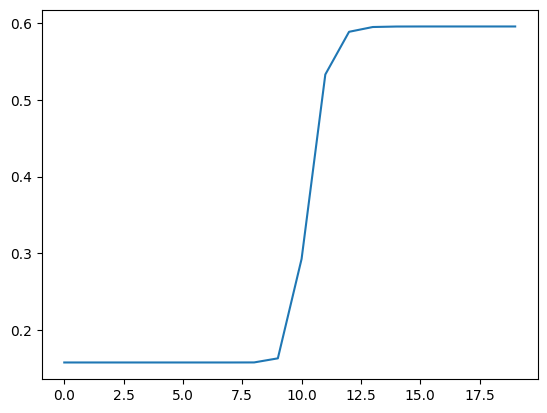

In [53]:
# plt.plot(alphas, rmses)
plt.plot(list(range(20)), rmses)
plt.show()

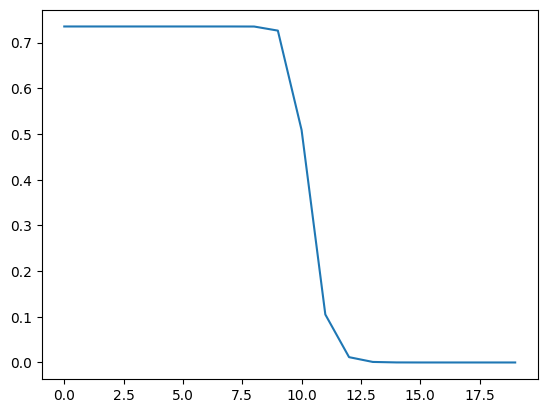

In [54]:
plt.plot(list(range(20)), r2s)
plt.show()